In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/newb-dev-1008/GetBoarded_Latitude/master/Week%202%20Data/covid_recovery_data.csv'
df = pd.read_csv(url)

In [0]:
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,NaN,-20.0,30.0,23.0,1.0,3.0
23756,2020-04-17,Zimbabwe,NaN,-20.0,30.0,24.0,2.0,3.0
23757,2020-04-18,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0
23758,2020-04-19,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0


In [0]:
df.isna().sum()

Date                  0
Country/Region        0
Province/State    16380
Lat                   0
Long                  0
Confirmed            90
Recovered          1260
Deaths               90
dtype: int64

In [0]:
index=df[ (df['Confirmed']==0)  & (df['Recovered']==0) &  (df['Deaths']==0 )].index

In [0]:
df.drop(index , inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14377 entries, 33 to 23759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            14377 non-null  object 
 1   Country/Region  14377 non-null  object 
 2   Province/State  5736 non-null   object 
 3   Lat             14377 non-null  float64
 4   Long            14377 non-null  float64
 5   Confirmed       14287 non-null  float64
 6   Recovered       13117 non-null  float64
 7   Deaths          14287 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1010.9+ KB


In [0]:
pip install --upgrade geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 24.4MB/s 
     |████████████████████████████████| 14.7MB 333kB/s 
Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [0]:
import matplotlib.pyplot as plt
import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
geo= [Point(xy) for xy in zip(df['Lat'], df['Long'])]

In [0]:
geo_df=gpd.GeoDataFrame(df, geometry=geo)

In [0]:
geo_df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,geometry
33,2020-02-24,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
34,2020-02-25,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
35,2020-02-26,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
36,2020-02-27,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
37,2020-02-28,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
...,...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,NaN,-20.0,30.0,23.0,1.0,3.0,POINT (-20.00000 30.00000)
23756,2020-04-17,Zimbabwe,NaN,-20.0,30.0,24.0,2.0,3.0,POINT (-20.00000 30.00000)
23757,2020-04-18,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0,POINT (-20.00000 30.00000)
23758,2020-04-19,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0,POINT (-20.00000 30.00000)


In [0]:
geo_df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,geometry
33,2020-02-24,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
34,2020-02-25,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
35,2020-02-26,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
36,2020-02-27,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
37,2020-02-28,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)


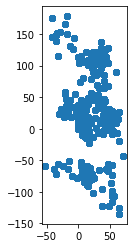

In [0]:
geo_df.plot()

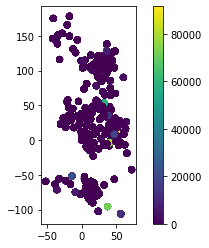

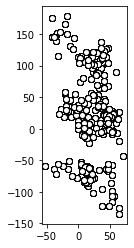

In [0]:
fig, ax = plt.subplots(1, 1)
base = geo_df.plot(color='white', edgecolor='black')
geo_df.plot(column='Recovered',ax=ax ,legend=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


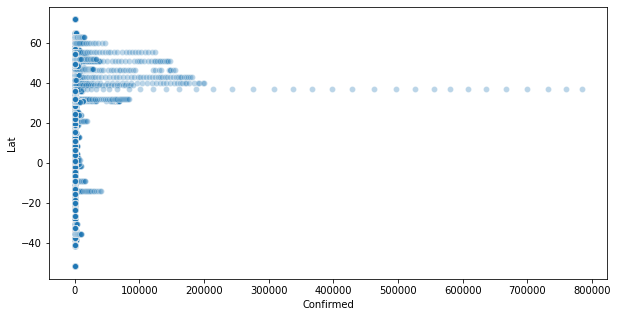

In [0]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,5))
sns.scatterplot(df['Confirmed'], df['Lat'],   alpha=0.3)

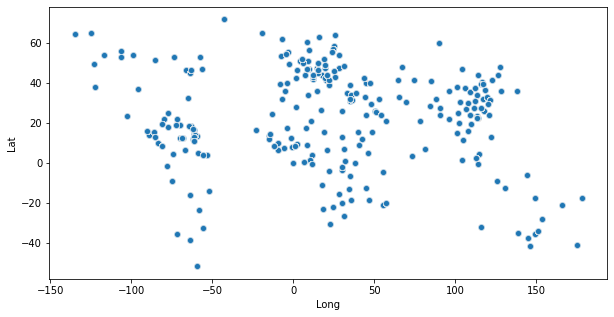

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Long'], df['Lat'],   alpha=0.3)

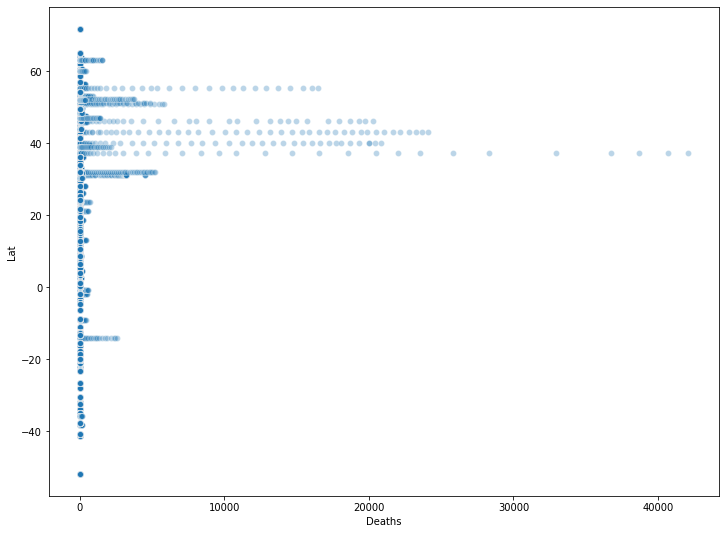

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 9))
sns.scatterplot(df['Deaths'], df['Lat'],   alpha=0.3)

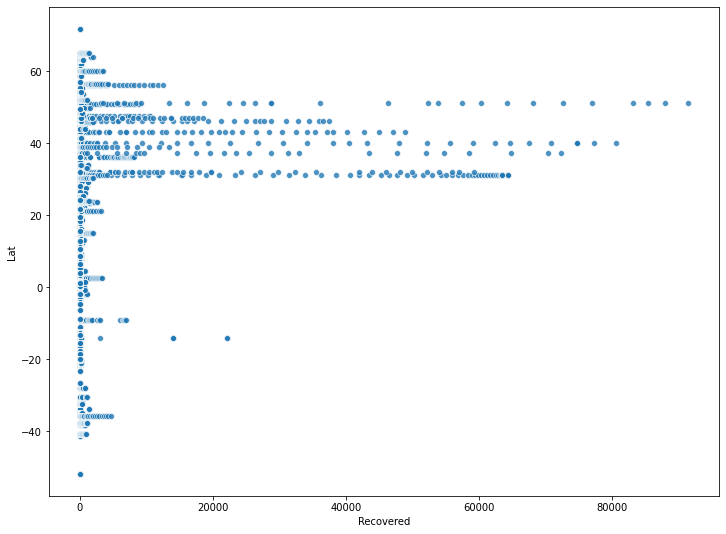

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 9))
sns.scatterplot(df['Recovered'], df['Lat'],   alpha=0.8,palette='deep')


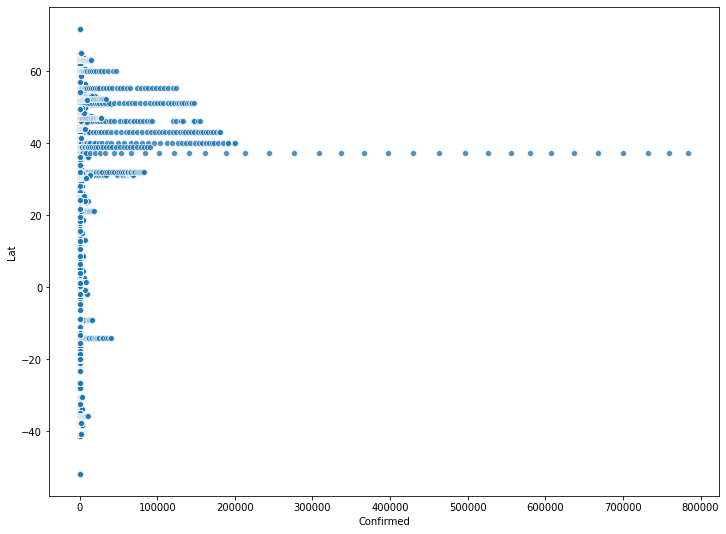

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 9))
sns.scatterplot(df['Confirmed'], df['Lat'],   alpha=0.8,palette='bright')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14377 entries, 33 to 23759
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            14377 non-null  object  
 1   Country/Region  14377 non-null  object  
 2   Province/State  5736 non-null   object  
 3   Lat             14377 non-null  float64 
 4   Long            14377 non-null  float64 
 5   Confirmed       14287 non-null  float64 
 6   Recovered       13117 non-null  float64 
 7   Deaths          14287 non-null  float64 
 8   geometry        14377 non-null  geometry
dtypes: float64(5), geometry(1), object(3)
memory usage: 1.1+ MB


In [0]:
df.drop('Province/State',inplace=True, axis=1 )

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14377 entries, 33 to 23759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            14377 non-null  object  
 1   Country/Region  14377 non-null  object  
 2   Lat             14377 non-null  float64 
 3   Long            14377 non-null  float64 
 4   Confirmed       14287 non-null  float64 
 5   Recovered       13117 non-null  float64 
 6   Deaths          14287 non-null  float64 
 7   geometry        14377 non-null  geometry
dtypes: float64(5), geometry(1), object(2)
memory usage: 1010.9+ KB


,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths,geometry
33,2020-02-24,Afghanistan,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
34,2020-02-25,Afghanistan,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
35,2020-02-26,Afghanistan,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
36,2020-02-27,Afghanistan,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
37,2020-02-28,Afghanistan,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,-20.0,30.0,23.0,1.0,3.0,POINT (-20.00000 30.00000)
23756,2020-04-17,Zimbabwe,-20.0,30.0,24.0,2.0,3.0,POINT (-20.00000 30.00000)
23757,2020-04-18,Zimbabwe,-20.0,30.0,25.0,2.0,3.0,POINT (-20.00000 30.00000)
23758,2020-04-19,Zimbabwe,-20.0,30.0,25.0,2.0,3.0,POINT (-20.00000 30.00000)
